In [3]:
# import recuired packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [468]:
t_list=np.linspace(0.0, 100, 1000)

In [1333]:
# define one-predator three-prey species model
#Predator recognises Prey1 and Prey 2 as the same prey
def functree(v,t,b1,b2,b3,r1,r2,r3,s,m1):
    dc1dt = v[0]*(v[4]*(b1*v[1]+b2*v[2]-m1)+v[5]*(b3*v[3]-m1))
    dr1dt = v[1]*(r1-s*v[1]-v[4]*v[0])
    dr2dt = v[2]*(r2-s*v[2]-v[4]*v[0])
    dr3dt = v[3]*(r3-s*v[3]-v[5]*v[0])
    da1dt = v[4]*(b1*(1-v[4])*v[1]+b2*(1-v[4])*v[2]-b3*v[5]*v[3])
    da2dt = v[5]*(b3*(1-v[5])*v[3]-v[4]*(b1*v[1]+b2*v[2]))
    return [dc1dt,dr1dt,dr2dt,dr3dt,da1dt,da2dt]

In [1334]:
# the parameters of this simulation( all cases)
b1 = 1.5
b2 = 2.5
b3 = 1.5
r1 = 4
r2 = 2
r3 = 1.8
s = 1
m1 = 2
m2 = 1.4


In [1335]:
v=[1,1,1,1,0.7,0.3] # initial conditon

In [1336]:
#solve this model using package odeint
var_list=odeint(functree,v,t_list,args=(b1,b2,b3,r1,r2,r3,s,m1))

(0.0, 5.313640956004794)

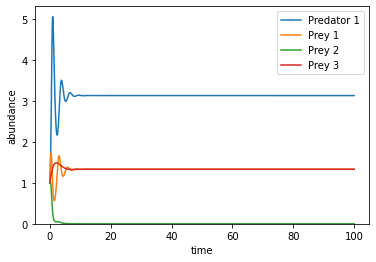

In [1337]:
#plot one-predator three-prey model simulation
plt.plot(t_list,var_list[:,0],label="Predator 1")
plt.plot(t_list,var_list[:,1],label="Prey 1")
plt.plot(t_list,var_list[:,2],label="Prey 2")
plt.plot(t_list,var_list[:,3],label="Prey 3")
plt.xlabel('time')
plt.ylabel('abundance')
plt.legend()
plt.ylim(0,)

In [1338]:
init = [1,1,1,1,1,0.5,0.5,0.5,0.5] # initial conditon(Case2,Case3)
init2 = [1,1,1,1,1,0.5,0.5,0.4,0.3,0.3] #inital condition(Case4)

In [1437]:
#define two-predator three-prey model(case2)
def functree(v,t,b1,b2,b3,r1,r2,r3,s,m1,m2):
    dc1dt = v[0]*(v[5]*(b1*v[2]+b2*v[3])+v[6]*b3*v[4]-m1)
    dc2dt = v[1]*(v[7]*b1*v[2]+v[8]*(b2*v[3]+b3*v[4])-m2)
    dr1dt = v[2]*(r1-s*v[2]-v[5]*v[0]-v[7]*v[1])
    dr2dt = v[3]*(r2-s*v[3]-v[5]*v[0]-v[8]*v[1])
    dr3dt = v[4]*(r3-s*v[4]-v[6]*v[0]-v[8]*v[1])
    da1dt = v[5]*(b1*(1-v[5])*v[2]+b2*(1-v[5])*v[3]-b3*v[4]*v[6])
    da2dt = v[6]*(b3*(1-v[6])*v[4]-v[5]*(b1*v[2]+b2*v[3]))
    da3dt = v[7]*(b1*(1-v[7])*v[2]-v[8]*(b2*v[3]+b3*v[4]))
    da4dt = v[8]*((1-v[8])*(b2*v[3]+b3*v[4])-b1*v[2]*v[7])
    return [dc1dt,dc2dt,dr1dt,dr2dt,dr3dt,da1dt,da2dt,da3dt,da4dt]

In [1438]:
#caluculate this model(case2)
var_list = odeint(functree, init, t_list, args=(b1,b2,b3,r1,r2,r3,s,m1,m2))

(0.0, 4.501314026997864)

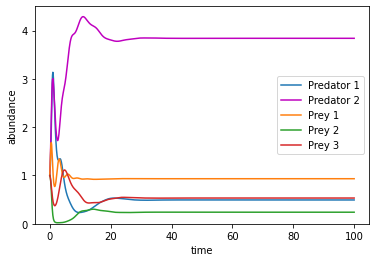

In [1439]:
#plot this model(case2)
plt.plot(t_list,var_list[:,0],label="Predator 1")
plt.plot(t_list,var_list[:,1],label="Predator 2",color="m")
plt.plot(t_list,var_list[:,2],label="Prey 1")
plt.plot(t_list,var_list[:,3],label="Prey 2")
plt.plot(t_list,var_list[:,4],label="Prey 3")
plt.xlabel('time')
plt.ylabel('abundance')
plt.legend()
plt.ylim(0,)

In [1434]:
# define two-predator three-prey model (Case3)
def functree(v,t,b1,b2,b3,r1,r2,r3,s,m1,m2):
    dc1dt = v[0]*(v[5]*(b1*v[2]+b2*v[3])+v[6]*b3*v[4]-m1)
    dc2dt = v[1]*(v[7]*(b1*v[2]+b3*v[4])+v[8]*b2*v[3]-m2)
    dr1dt = v[2]*(r1-s*v[2]-v[5]*v[0]-v[7]*v[1])
    dr2dt = v[3]*(r2-s*v[3]-v[5]*v[0]-v[8]*v[1])
    dr3dt = v[4]*(r3-s*v[4]-v[6]*v[0]-v[7]*v[1])
    da1dt = v[5]*(b1*(1-v[5])*v[2]+b2*(1-v[5])*v[3]-b3*v[4]*v[6])
    da2dt = v[6]*(b3*(1-v[6])*v[4]-v[5]*(b1*v[2]+b2*v[3]))
    da3dt = v[7]*(b1*v[2]+b3*v[4]-v[7]*(b1*v[2]+b3*v[4])-v[8]*b2*v[3])
    da4dt = v[8]*(b2*v[3]-v[7]*(b1*v[2]+b3*v[4])-v[8]*b2*v[3])
    return [dc1dt,dc2dt,dr1dt,dr2dt,dr3dt,da1dt,da2dt,da3dt,da4dt]

In [1435]:
#caluculate model (Case 3)
var_list = odeint(functree, init, t_list, args=(b1,b2,b3,r1,r2,r3,s,m1,m2))

(0.0, 3.487221288101358)

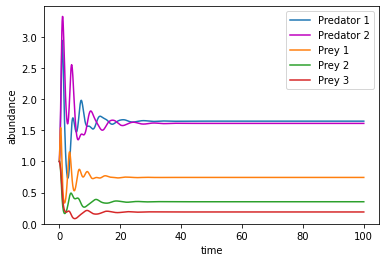

In [1436]:
#plot model(Case3)
plt.plot(t_list,var_list[:,0],label="Predator 1")
plt.plot(t_list,var_list[:,1],label="Predator 2",color="m")
plt.plot(t_list,var_list[:,2],label="Prey 1")
plt.plot(t_list,var_list[:,3],label="Prey 2")
plt.plot(t_list,var_list[:,4],label="Prey 3")
plt.xlabel('time')
plt.ylabel('abundance')
plt.legend()
plt.ylim(0,)

In [1346]:
# define the model of predator-prey(case4)
def functree(v,t,b1,b2,b3,r1,r2,r3,s,m1,m2):
    dc1dt = v[0]*(v[5]*(b1*v[2]+b2*v[3])+v[6]*b3*v[4]-m1)
    dc2dt = v[1]*(v[7]*b1*v[2]+v[8]*b2*v[3]+v[9]*b3*v[4]-m2)
    dr1dt = v[2]*(r1-s*v[2]-v[5]*v[0]-v[7]*v[1])
    dr2dt = v[3]*(r2-s*v[3]-v[5]*v[0]-v[8]*v[1])
    dr3dt = v[4]*(r3-s*v[4]-v[6]*v[0]-v[9]*v[1])
    da1dt = v[5]*(b1*(1-v[5])*v[2]+b2*(1-v[5])*v[3]-b3*v[4]*v[6])
    da2dt = v[6]*(b3*(1-v[6])*v[4]-v[5]*(b1*v[2]+b2*v[3]))
    da3dt = v[7]*(b1*v[2]-b1*v[7]*v[2]-v[8]*b2*v[3]-v[9]*b3*v[4])
    da4dt = v[8]*(b2*v[3]-b1*v[7]*v[2]-v[8]*b2*v[3]-v[9]*b3*v[4])
    da5dt = v[9]*(b3*v[4]-b1*v[7]*v[2]-v[8]*b2*v[3]-v[9]*b3*v[4])
    return [dc1dt,dc2dt,dr1dt,dr2dt,dr3dt,da1dt,da2dt,da3dt,da4dt,da5dt]

In [1347]:
#Caluculate model(case4)
var_list = odeint(functree, init2, t_list, args=(b1,b2,b3,r1,r2,r3,s,m1,m2))

(0.0, 4.33124193194116)

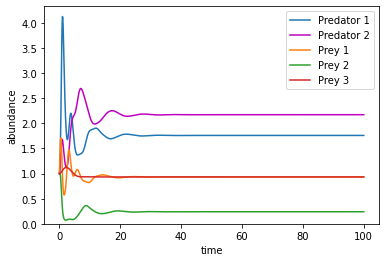

In [1348]:
#plot model(case4)
plt.plot(t_list,var_list[:,0],label="Predator 1")
plt.plot(t_list,var_list[:,1],label="Predator 2",color="m")
plt.plot(t_list,var_list[:,2],label="Prey 1")
plt.plot(t_list,var_list[:,3],label="Prey 2")
plt.plot(t_list,var_list[:,4],label="Prey 3")
plt.xlabel('time')
plt.ylabel('abundance')
plt.legend()
plt.ylim(0,)

In [1433]:
#predator adaptive foraging  is faster than  other dynamics

In [ ]:
# define equations 

In [1349]:
def threeprey(v,b1,b2,b3,r1,r2,r3,s,m1,a1,a2):
    dc1dt = v[0]*(a1*(b1*v[1]+b2*v[2]-m1)+a2*(b3*v[3]-m1))
    dr1dt = v[1]*(r1-s*v[1]-a1*v[0])
    dr2dt = v[2]*(r2-s*v[2]-a1*v[0])
    dr3dt = v[3]*(r3-s*v[3]-a2*v[0])
    outcome = np.array([dc1dt,dr1dt,dr2dt,dr3dt])
    return outcome

In [1350]:
def thpreytwopredatorcase2(v,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22):
    dc1dt = v[0]*(a11*(b1*v[2]+b2*v[3])+a12*b3*v[4]-m1)
    dc2dt = v[1]*(a21*b1*v[2]+a22*(b2*v[3]+b3*v[4])-m2)
    dr1dt = v[2]*(r1-s*v[2]-a11*v[0]-a21*v[1])
    dr2dt = v[3]*(r2-s*v[3]-a11*v[0]-a22*v[1])
    dr3dt = v[4]*(r3-s*v[4]-a12*v[0]-a22*v[1])
    outcome = np.array([dc1dt,dc2dt,dr1dt,dr2dt,dr3dt])
    return outcome

In [1351]:
def thpreytwopredatorcase3(v,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22):
    dc1dt = v[0]*(a11*(b1*v[2]+b2*v[3])+a12*b3*v[4]-m1)
    dc2dt = v[1]*(a21*(b1*v[2]+b3*v[4])+a22*b2*v[3]-m2)
    dr1dt = v[2]*(r1-s*v[2]-a11*v[0]-a21*v[1])
    dr2dt = v[3]*(r2-s*v[3]-a11*v[0]-a22*v[1])
    dr3dt = v[4]*(r3-s*v[4]-a12*v[0]-a21*v[1])
    outcome =np.array([dc1dt,dc2dt,dr1dt,dr2dt,dr3dt])
    return outcome

In [1352]:
def thpreytwopredatorcase4(v,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22,a23):
    dc1dt = v[0]*(a11*(b1*v[2]+b2*v[3])+a12*b3*v[4]-m1)
    dc2dt = v[1]*(a21*b1*v[2]+a22*b2*v[3]+a23*b3*v[4]-m2)
    dr1dt = v[2]*(r1-s*v[2]-a11*v[0]-a21*v[1])
    dr2dt = v[3]*(r2-s*v[3]-a11*v[0]-a22*v[1])
    dr3dt = v[4]*(r3-s*v[4]-a12*v[0]-a23*v[1])
    outcome = np.array([dc1dt,dc2dt,dr1dt,dr2dt,dr3dt])
    return outcome

In [1353]:
# define foraging behaviour(Predator recognizes prey 1 and prey2 as same prey)
def onepredatoradaptive(b1,b2,b3,R1,R2,R3):
    gain1 = b1*R1+b2*R2
    gain2 = b3*R3
    if gain1 > gain2:
        a1 = 1
        a2 = 0
    elif gain1 < gain2:
        a1 = 0
        a2 = 1
    else:
        a1 = 1/2
        a2 = 1/2
    
    return [a1,a2]

In [1354]:
## define foraging behaviour(Predator recognizes prey 2 and prey3 as same prey)
def anotherpredatoradaptivecase2(b1,b2,b3,R1,R2,R3):
    gain1 = b1*R1
    gain2 = b2*R2 + b3*R3
    if gain1 > gain2:
        a1 = 1
        a2 = 0
    elif gain1 < gain2:
        a1 = 0
        a2 = 1
    else:
        a1 = 1/2
        a2 = 1/2
    
    return [a1,a2]

In [1355]:
# define foraging behaviour(Predator recognizes prey 1 and prey3 as same prey)
def anotherpredatoradaptivecase3(b1,b2,b3,R1,R2,R3):
    gain1 = b1*R1 + b3*R3
    gain2 = b2*R2 
    if gain1 > gain2:
        a1 = 1
        a2 = 0
    elif gain1 < gain2:
        a1 = 0
        a2 = 1
    else:
        a1 = 1/2
        a2 = 1/2
    
    return [a1,a2]

In [1356]:
# define foraging behaviour(Predator distinguishes all prey species)
def anotherpredatoradaptivecase4(b1,b2,b3,R1,R2,R3):
    gain1 = b1*R1
    gain2 = b2*R2 
    gain3 = b3*R3
    if gain1 > gain2:
        if gain2 > gain3:
            a1 = 1
            a2 = 0
            a3 = 0
        elif gain3 > gain1:
            a1 = 0
            a2 = 0
            a3 = 1
        else:
            a1 = 1/2
            a2 = 0
            a3 = 1/2
    elif gain1 < gain2:
        if gain2 > gain3:
            a1 = 0
            a2 = 1
            a3 = 0
        elif gain3 > gain2:
            a1 = 0
            a2 = 0
            a3 = 1
        else:
            a1 = 0
            a2 = 1/2
            a3 = 1/2
    else:
        if gain1 > gain3:
            a1 = 1/2
            a2 = 1/2
            a3 = 0
        else:
            a1 = 1/3
            a2 = 1/3
            a3 = 1/3
    
    return [a1,a2,a3]

In [ ]:
#simulate population dynamics (using runge-kutta algholism)

In [1357]:
def preyonepredatorthree(v:list,b1,b2,b3,r1,r2,r3,s,m1,a11,a12,h,n):
    var_list = np.array(v)
    v = np.array(v)
    for i in range(n):
        bv = v
        k1 = threeprey(v,b1,b2,b3,r1,r2,r3,s,m1,a11,a12)*h
        k2 = threeprey(v+k1/2,b1,b2,b3,r1,r2,r3,s,m1,a11,a12)*h
        k3 = threeprey(v+k2/2,b1,b2,b3,r1,r2,r3,s,m1,a11,a12)*h
        k4 = threeprey(v+k3,b1,b2,b3,r1,r2,r3,s,m1,a11,a12)*h
        v  =  bv + (k1+2*k2+2*k3+k4)/6
        R1 = v[1]
        R2 = v[2]
        R3 = v[3]
        a = onepredatoradaptive(b1,b2,b3,R1,R2,R3)
        a11 = a[0]
        a12 = a[1]
        var_list=np.vstack((var_list,v))
    
    return var_list

In [1388]:
v = [1.0,1.0,1.0,1.0]

In [1389]:
ll=preyonepredatorthree(v,b1,b2,b3,r1,r2,r3,s,m1,0.5,0.5,0.01,10000)

In [1390]:
ll

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00766570e+00, 1.02516689e+00, 1.00496838e+00, 1.00297048e+00],
       [1.02869078e+00, 1.04531868e+00, 1.00473739e+00, 1.01095601e+00],
       ...,
       [3.15158521e+00, 1.35385725e+00, 4.73530748e-30, 1.29402973e+00],
       [3.15239471e+00, 1.34707157e+00, 4.68106896e-30, 1.30055126e+00],
       [3.15288621e+00, 1.34040136e+00, 4.62742162e-30, 1.30702076e+00]])

In [1418]:
time = np.arange(0,100.01,0.01)

(0.0, 4.80783645224518)

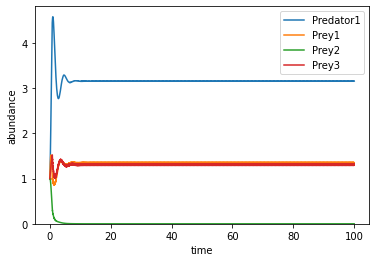

In [1423]:
plt.plot(time,ll[:,0],label="Predator1")
plt.plot(time,ll[:,1],label="Prey1")
plt.plot(time,ll[:,2],label="Prey2")
plt.plot(time,ll[:,3],label="Prey3")
plt.xlabel('time')
plt.ylabel('abundance')
plt.legend()
plt.ylim(0,)

In [1392]:
def threepreytwopredatorcase2(v:list,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22,h,n):
    var_list = np.array(v)
    v = np.array(v)
    for i in range(n):
        bv = v
        k1 = thpreytwopredatorcase2(v,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22)*h
        k2 = thpreytwopredatorcase2(v+k1/2,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22)*h
        k3 = thpreytwopredatorcase2(v+k2/2,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22)*h
        k4 = thpreytwopredatorcase2(v+k3,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22)*h
        v  =  bv + (k1+2*k2+2*k3+k4)/6
        R1 = v[2]
        R2 = v[3]
        R3 = v[4]
        a = onepredatoradaptive(b1,b2,b3,R1,R2,R3)
        a11 = a[0]
        a12 = a[1]
        b =  anotherpredatoradaptivecase2(b1,b2,b3,R1,R2,R3)
        a21 = b[0]
        a22 = b[1]
        var_list=np.vstack((var_list,v))
    return var_list

In [1393]:
v = [1.0,1.0,1.0,1.0,1.0]

In [1427]:
l2case2 = threepreytwopredatorcase2(v,b1,b2,b3,r1,r2,r3,s,m1,m2,0.5,0.5,0.5,0.5,0.01,10000)

(0.0, 4.35899445004603)

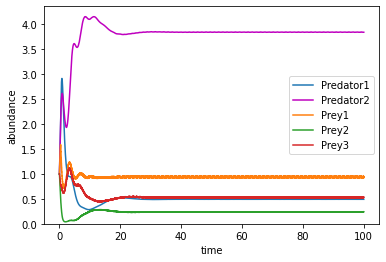

In [1428]:
plt.plot(time,l2case2[:,0],label="Predator1")
plt.plot(time,l2case2[:,1],color="m",label="Predator2")
plt.plot(time,l2case2[:,2],label="Prey1")
plt.plot(time,l2case2[:,3],label="Prey2")
plt.plot(time,l2case2[:,4],label="Prey3")
plt.xlabel('time')
plt.ylabel('abundance')
plt.legend()
plt.ylim(0,)

In [1396]:
def threepreytwopredatorcase3(v:list,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22,h,n):
    var_list = np.array(v)
    v = np.array(v)
    for i in range(n):
        bv = v
        k1 = thpreytwopredatorcase3(v,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22)*h
        k2 = thpreytwopredatorcase3(v+k1/2,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22)*h
        k3 = thpreytwopredatorcase3(v+k2/2,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22)*h
        k4 = thpreytwopredatorcase3(v+k3,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22)*h
        v  =  bv + (k1+2*k2+2*k3+k4)/6
        R1 = v[2]
        R2 = v[3]
        R3 = v[4]
        a = onepredatoradaptive(b1,b2,b3,R1,R2,R3)
        a11 = a[0]
        a12 = a[1]
        b =  anotherpredatoradaptivecase3(b1,b2,b3,R1,R2,R3)
        a21 = b[0]
        a22 = b[1]
        var_list=np.vstack((var_list,v))
    return var_list

In [1430]:
l2case3 = threepreytwopredatorcase3(v,b1,b2,b3,r1,r2,r3,s,m1,m2,0.5,0.5,0.5,0.5,0.01,10000)

(0.0, 3.0771898665461164)

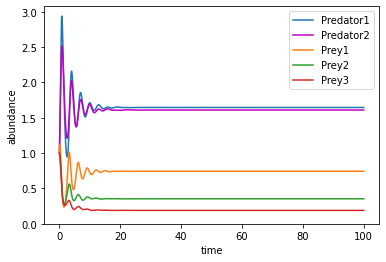

In [1431]:
plt.plot(time,l2case3[:,0],label="Predator1")
plt.plot(time,l2case3[:,1],color="m",label="Predator2")
plt.plot(time,l2case3[:,2],label="Prey1")
plt.plot(time,l2case3[:,3],label="Prey2")
plt.plot(time,l2case3[:,4],label="Prey3")
plt.xlabel('time')
plt.ylabel('abundance')
plt.legend()
plt.ylim(0,)

In [1399]:
def threepreytwopredatorcase4(v:list,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22,a23,h,n):
    var_list = np.array(v)
    v = np.array(v)
    for i in range(n):
        bv = v
        k1 = thpreytwopredatorcase4(v,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22,a23)*h
        k2 = thpreytwopredatorcase4(v+k1/2,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22,a23)*h
        k3 = thpreytwopredatorcase4(v+k2/2,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22,a23)*h
        k4 = thpreytwopredatorcase4(v+k3,b1,b2,b3,r1,r2,r3,s,m1,m2,a11,a12,a21,a22,a23)*h
        v  =  bv + (k1+2*k2+2*k3+k4)/6
        R1 = v[2]
        R2 = v[3]
        R3 = v[4]
        a = onepredatoradaptive(b1,b2,b3,R1,R2,R3)
        a11 = a[0]
        a12 = a[1]
        b =  anotherpredatoradaptivecase4(b1,b2,b3,R1,R2,R3)
        a21 = b[0]
        a22 = b[1]
        a23 = b[2]
        var_list=np.vstack((var_list,v))
    return var_list

In [1401]:
l2case4 = threepreytwopredatorcase4(v,b1,b2,b3,r1,r2,r3,s,m1,m2,0.5,0.5,0.3,0.3,0.4,0.01,10000)

(0.0, 3.902942567777028)

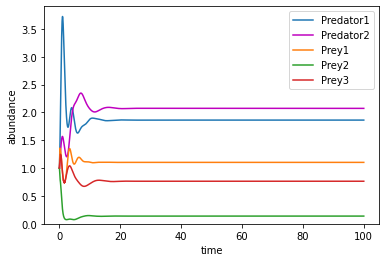

In [1432]:
plt.plot(time,l2case4[:,0],label="Predator1")
plt.plot(time,l2case4[:,1],color="m",label="Predator2")
plt.plot(time,l2case4[:,2],label="Prey1")
plt.plot(time,l2case4[:,3],label="Prey2")
plt.plot(time,l2case4[:,4],label="Prey3")
plt.xlabel('time')
plt.ylabel('abundance')
plt.legend()
plt.ylim(0,)

In [1404]:
l2case4[900,1]

2.1447150333001814